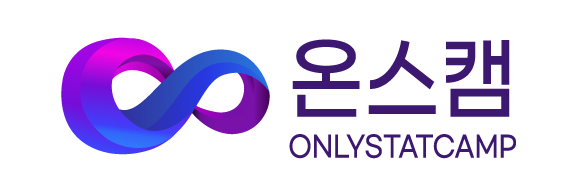

<img src="https://upload.wikimedia.org/wikipedia/commons/9/96/Pytorch_logo.png?20211003060202" height="100">

In [ ]:
import torch

In [ ]:
torch.__version__

'2.3.0+cu121'

## Tensorflow vs. Pytorch

1. 계산 그래프:

    * TensorFlow: 정적 계산 그래프
    * PyTorch: 동적 계산 그래프

2. 사용자 경험:

    * TensorFlow: 풍부한 생태계와 도구, 정적 그래프의 최적화
    * PyTorch: 직관적이고 Pythonic한 코드, 동적 그래프의 유연성

3. 디버깅 및 개발 속도:

    * TensorFlow: 그래프를 먼저 정의하고 실행하므로 디버깅이 어렵고 시간이 더 소요될 수 있음
    * PyTorch: 실행 시점에 그래프가 정의되므로 디버깅과 개발이 더 용이하고 빠름

4. 생태계 및 확장성:

    * TensorFlow: 모델 서빙, 모바일 배포 등 다양한 도구와의 통합이 우수
    * PyTorch: 연구 및 프로토타이핑에 최적화

## PyTorch 신경망 기초

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

net = Net()
print(net)


Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


## PyTorch 모델 학습

> PyTorch의 torchvision 패키지를 사용하여 MNIST 데이터셋을 로드합니다.


In [ ]:
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))]
    )

In [ ]:
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

In [ ]:
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

> 손실 함수와 옵티마이저를 정의합니다.


In [ ]:
import torch.optim as optim

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [ ]:
# 학습 루프
for epoch in range(2):  # 데이터셋을 여러 번 반복 학습

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 입력 데이터
        inputs, labels = data

        # 옵티마이저 초기화
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화
        outputs = net(inputs.view(-1, 28*28))
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계 출력
        running_loss += loss.item()
        # if i % 100 == 99:    # 100 미니배치마다 출력
        if (i+1) % 100 == 0:    # 100 미니배치마다 출력
            print('epoch: {:<5d} iteration: {:<5d} loss: {:<.3f}'.format(epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

epoch: 1     iteration: 100   loss: 1.381
epoch: 1     iteration: 200   loss: 0.539
epoch: 1     iteration: 300   loss: 0.448
epoch: 1     iteration: 400   loss: 0.422
epoch: 1     iteration: 500   loss: 0.348
epoch: 1     iteration: 600   loss: 0.343
epoch: 1     iteration: 700   loss: 0.310
epoch: 1     iteration: 800   loss: 0.284
epoch: 1     iteration: 900   loss: 0.271
epoch: 1     iteration: 1000  loss: 0.249
epoch: 1     iteration: 1100  loss: 0.267
epoch: 1     iteration: 1200  loss: 0.264
epoch: 1     iteration: 1300  loss: 0.216
epoch: 1     iteration: 1400  loss: 0.230
epoch: 1     iteration: 1500  loss: 0.250
epoch: 1     iteration: 1600  loss: 0.222
epoch: 1     iteration: 1700  loss: 0.194
epoch: 1     iteration: 1800  loss: 0.208
epoch: 2     iteration: 100   loss: 0.184
epoch: 2     iteration: 200   loss: 0.170
epoch: 2     iteration: 300   loss: 0.181
epoch: 2     iteration: 400   loss: 0.191
epoch: 2     iteration: 500   loss: 0.168
epoch: 2     iteration: 600   loss

---

## 중급 신경망 구조: Convolutional Neural Network (CNN)

* CNN 구조
    > Conv2d 레이어:
        이미지의 공간적 특징을 추출합니다.  
    > MaxPool2d 레이어:
        특징 맵의 크기를 줄여 계산량을 줄이고 중요한 특징을 강조합니다.  
    > Fully Connected 레이어:
        최종 분류를 수행합니다.  

In [ ]:
28*28 --> 14*14 --> 7*7*64

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = CNN()
print(net)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

for epoch in range(2):  # 2 epochs
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()  # Gradient 초기화

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  # 매 100 미니배치마다 출력
            print('epoch: {:<5d} iteration: {:<5d} loss: {:<.3f}'.format(epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

epoch: 1     iteration: 100   loss: 1.281
epoch: 1     iteration: 200   loss: 0.331
epoch: 1     iteration: 300   loss: 0.167
epoch: 1     iteration: 400   loss: 0.158
epoch: 1     iteration: 500   loss: 0.131
epoch: 1     iteration: 600   loss: 0.110
epoch: 1     iteration: 700   loss: 0.092
epoch: 1     iteration: 800   loss: 0.092
epoch: 1     iteration: 900   loss: 0.104
epoch: 1     iteration: 1000  loss: 0.084
epoch: 1     iteration: 1100  loss: 0.071
epoch: 1     iteration: 1200  loss: 0.087
epoch: 1     iteration: 1300  loss: 0.074
epoch: 1     iteration: 1400  loss: 0.065
epoch: 1     iteration: 1500  loss: 0.053
epoch: 1     iteration: 1600  loss: 0.064
epoch: 1     iteration: 1700  loss: 0.062
epoch: 1     iteration: 1800  loss: 0.056
epoch: 2     iteration: 100   loss: 0.048
epoch: 2     iteration: 200   loss: 0.055
epoch: 2     iteration: 300   loss: 0.036
epoch: 2     iteration: 400   loss: 0.054
epoch: 2     iteration: 500   loss: 0.048
epoch: 2     iteration: 600   loss

> 학습된 모델을 평가합니다.

In [ ]:
correct = 0
total = 0

with torch.no_grad():

    for data in testloader:

        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy {:>.2%}'.format(correct / total))

Accuracy 99.03%


In [ ]:
torch.max(outputs.data, 1)

torch.return_types.max(
values=tensor([10.9882, 11.8064, 16.2925, 17.5105, 16.5676, 16.2745, 13.2152, 13.7255,
        13.2135, 11.5183, 10.7652, 15.5486, 12.4540, 17.3375, 14.3024, 13.4815]),
indices=tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6]))

In [ ]:
outputs.data[0]

tensor([-2.5207, 10.9882, -2.9531, -4.6916,  1.8544, -2.4834, -1.3044,  0.8838,
        -0.8338, -0.5849])

---

## CNN 모델에 Dropout 및 Batch Normalization 추가


In [ ]:
class EnhancedCNN(nn.Module):
    def __init__(self):
        super(EnhancedCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = x.view(-1, 64 * 7 * 7)  # Flatten the tensor
        x = self.dropout(F.relu(self.bn3(self.fc1(x))))
        x = self.fc2(x)
        return x

net = EnhancedCNN()
print(net)

EnhancedCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

def train_model(net, trainloader, criterion, optimizer, epoch):
    net.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()  # Gradient 초기화

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    avg_training_loss = running_loss / len(trainloader)
    print(f"Epoch [{epoch+1}], Training loss: {avg_training_loss:.3f}")

def evaluate_model(net, testloader, criterion):
    net.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    avg_test_loss = running_loss / len(testloader)
    accuracy = 100 * correct / total
    return avg_test_loss, accuracy


> PyTorch는 train()과 eval() 메서드를 사용하여 모델이 학습 모드인지 평가 모드인지 지정합니다.

- model.train(): 학습 모드로 설정합니다. Dropout 및 Batch Normalization이 활성화됩니다.
- model.eval(): 평가 모드로 설정합니다. Dropout이 비활성화되고, Batch Normalization이 추정된 평균 및 분산을 사용합니다.

In [ ]:
for epoch in range(2):  # 2 epochs
    train_model(net, trainloader, criterion, optimizer, epoch)
    test_loss, accuracy = evaluate_model(net, testloader, criterion)
    print(f"Test loss: {test_loss:.3f}, Accuracy: {accuracy:.2f}%")

Epoch [1], Training loss: 0.117
Test loss: 0.040, Accuracy: 98.77%
Epoch [2], Training loss: 0.051
Test loss: 0.027, Accuracy: 99.07%


---

## PyTorch에서 사전 정의된 모델 불러오기


https://pytorch.org/vision/stable/models.html

* AlexNet
* ConvNeXt
* DenseNet
* EfficientNet
* EfficientNetV2
* GoogLeNet
* Inception V3
* MaxVit
* MNASNet
* MobileNet V2
* MobileNet V3
* RegNet
* ResNet
* ResNeXt
* ShuffleNet V2
* SqueezeNet
* SwinTransformer
* VGG
* VisionTransformer
* Wide ResNet


In [ ]:
import pandas as pd

In [ ]:
pd.read_html("https://pytorch.org/vision/stable/models.html")[1]

,Weight,Acc@1,Acc@5,Params,GFLOPS,Recipe
0,AlexNet_Weights.IMAGENET1K_V1,56.522,79.066,61.1M,0.71,link
1,ConvNeXt_Base_Weights.IMAGENET1K_V1,84.062,96.870,88.6M,15.36,link
2,ConvNeXt_Large_Weights.IMAGENET1K_V1,84.414,96.976,197.8M,34.36,link
3,ConvNeXt_Small_Weights.IMAGENET1K_V1,83.616,96.650,50.2M,8.68,link
4,ConvNeXt_Tiny_Weights.IMAGENET1K_V1,82.520,96.146,28.6M,4.46,link
...,...,...,...,...,...,...
110,ViT_L_32_Weights.IMAGENET1K_V1,76.972,93.070,306.5M,15.38,link
111,Wide_ResNet101_2_Weights.IMAGENET1K_V1,78.848,94.284,126.9M,22.75,link
112,Wide_ResNet101_2_Weights.IMAGENET1K_V2,82.510,96.020,126.9M,22.75,link
113,Wide_ResNet50_2_Weights.IMAGENET1K_V1,78.468,94.086,68.9M,11.40,link


<table class="table-weights docutils align-default">
<colgroup>
<col style="width: 57%">
<col style="width: 9%">
<col style="width: 9%">
<col style="width: 9%">
<col style="width: 9%">
<col style="width: 5%">
</colgroup>
<thead>
<tr class="row-odd"><th class="head"><p><strong>Weight</strong></p></th>
<th class="head"><p><strong>Acc@1</strong></p></th>
<th class="head"><p><strong>Acc@5</strong></p></th>
<th class="head"><p><strong>Params</strong></p></th>
<th class="head"><p><strong>GFLOPS</strong></p></th>
<th class="head"><p><strong>Recipe</strong></p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.alexnet.html#torchvision.models.AlexNet_Weights" title="torchvision.models.AlexNet_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">AlexNet_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>56.522</p></td>
<td><p>79.066</p></td>
<td><p>61.1M</p></td>
<td><p>0.71</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#alexnet-and-vgg">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.convnext_base.html#torchvision.models.ConvNeXt_Base_Weights" title="torchvision.models.ConvNeXt_Base_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">ConvNeXt_Base_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>84.062</p></td>
<td><p>96.87</p></td>
<td><p>88.6M</p></td>
<td><p>15.36</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#convnext">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.convnext_large.html#torchvision.models.ConvNeXt_Large_Weights" title="torchvision.models.ConvNeXt_Large_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">ConvNeXt_Large_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>84.414</p></td>
<td><p>96.976</p></td>
<td><p>197.8M</p></td>
<td><p>34.36</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#convnext">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.convnext_small.html#torchvision.models.ConvNeXt_Small_Weights" title="torchvision.models.ConvNeXt_Small_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">ConvNeXt_Small_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>83.616</p></td>
<td><p>96.65</p></td>
<td><p>50.2M</p></td>
<td><p>8.68</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#convnext">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.convnext_tiny.html#torchvision.models.ConvNeXt_Tiny_Weights" title="torchvision.models.ConvNeXt_Tiny_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">ConvNeXt_Tiny_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>82.52</p></td>
<td><p>96.146</p></td>
<td><p>28.6M</p></td>
<td><p>4.46</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#convnext">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.densenet121.html#torchvision.models.DenseNet121_Weights" title="torchvision.models.DenseNet121_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">DenseNet121_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>74.434</p></td>
<td><p>91.972</p></td>
<td><p>8.0M</p></td>
<td><p>2.83</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/pull/116">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.densenet161.html#torchvision.models.DenseNet161_Weights" title="torchvision.models.DenseNet161_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">DenseNet161_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>77.138</p></td>
<td><p>93.56</p></td>
<td><p>28.7M</p></td>
<td><p>7.73</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/pull/116">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.densenet169.html#torchvision.models.DenseNet169_Weights" title="torchvision.models.DenseNet169_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">DenseNet169_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>75.6</p></td>
<td><p>92.806</p></td>
<td><p>14.1M</p></td>
<td><p>3.36</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/pull/116">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.densenet201.html#torchvision.models.DenseNet201_Weights" title="torchvision.models.DenseNet201_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">DenseNet201_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>76.896</p></td>
<td><p>93.37</p></td>
<td><p>20.0M</p></td>
<td><p>4.29</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/pull/116">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.efficientnet_b0.html#torchvision.models.EfficientNet_B0_Weights" title="torchvision.models.EfficientNet_B0_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">EfficientNet_B0_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>77.692</p></td>
<td><p>93.532</p></td>
<td><p>5.3M</p></td>
<td><p>0.39</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#efficientnet-v1">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.efficientnet_b1.html#torchvision.models.EfficientNet_B1_Weights" title="torchvision.models.EfficientNet_B1_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">EfficientNet_B1_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>78.642</p></td>
<td><p>94.186</p></td>
<td><p>7.8M</p></td>
<td><p>0.69</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#efficientnet-v1">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.efficientnet_b1.html#torchvision.models.EfficientNet_B1_Weights" title="torchvision.models.EfficientNet_B1_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">EfficientNet_B1_Weights.IMAGENET1K_V2</span></code></a></p></td>
<td><p>79.838</p></td>
<td><p>94.934</p></td>
<td><p>7.8M</p></td>
<td><p>0.69</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/issues/3995#new-recipe-with-lr-wd-crop-tuning">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.efficientnet_b2.html#torchvision.models.EfficientNet_B2_Weights" title="torchvision.models.EfficientNet_B2_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">EfficientNet_B2_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>80.608</p></td>
<td><p>95.31</p></td>
<td><p>9.1M</p></td>
<td><p>1.09</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#efficientnet-v1">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.efficientnet_b3.html#torchvision.models.EfficientNet_B3_Weights" title="torchvision.models.EfficientNet_B3_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">EfficientNet_B3_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>82.008</p></td>
<td><p>96.054</p></td>
<td><p>12.2M</p></td>
<td><p>1.83</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#efficientnet-v1">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.efficientnet_b4.html#torchvision.models.EfficientNet_B4_Weights" title="torchvision.models.EfficientNet_B4_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">EfficientNet_B4_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>83.384</p></td>
<td><p>96.594</p></td>
<td><p>19.3M</p></td>
<td><p>4.39</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#efficientnet-v1">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.efficientnet_b5.html#torchvision.models.EfficientNet_B5_Weights" title="torchvision.models.EfficientNet_B5_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">EfficientNet_B5_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>83.444</p></td>
<td><p>96.628</p></td>
<td><p>30.4M</p></td>
<td><p>10.27</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#efficientnet-v1">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.efficientnet_b6.html#torchvision.models.EfficientNet_B6_Weights" title="torchvision.models.EfficientNet_B6_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">EfficientNet_B6_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>84.008</p></td>
<td><p>96.916</p></td>
<td><p>43.0M</p></td>
<td><p>19.07</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#efficientnet-v1">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.efficientnet_b7.html#torchvision.models.EfficientNet_B7_Weights" title="torchvision.models.EfficientNet_B7_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">EfficientNet_B7_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>84.122</p></td>
<td><p>96.908</p></td>
<td><p>66.3M</p></td>
<td><p>37.75</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#efficientnet-v1">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.efficientnet_v2_l.html#torchvision.models.EfficientNet_V2_L_Weights" title="torchvision.models.EfficientNet_V2_L_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">EfficientNet_V2_L_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>85.808</p></td>
<td><p>97.788</p></td>
<td><p>118.5M</p></td>
<td><p>56.08</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#efficientnet-v2">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.efficientnet_v2_m.html#torchvision.models.EfficientNet_V2_M_Weights" title="torchvision.models.EfficientNet_V2_M_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">EfficientNet_V2_M_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>85.112</p></td>
<td><p>97.156</p></td>
<td><p>54.1M</p></td>
<td><p>24.58</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#efficientnet-v2">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.efficientnet_v2_s.html#torchvision.models.EfficientNet_V2_S_Weights" title="torchvision.models.EfficientNet_V2_S_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">EfficientNet_V2_S_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>84.228</p></td>
<td><p>96.878</p></td>
<td><p>21.5M</p></td>
<td><p>8.37</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#efficientnet-v2">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.googlenet.html#torchvision.models.GoogLeNet_Weights" title="torchvision.models.GoogLeNet_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">GoogLeNet_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>69.778</p></td>
<td><p>89.53</p></td>
<td><p>6.6M</p></td>
<td><p>1.5</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#googlenet">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.inception_v3.html#torchvision.models.Inception_V3_Weights" title="torchvision.models.Inception_V3_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">Inception_V3_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>77.294</p></td>
<td><p>93.45</p></td>
<td><p>27.2M</p></td>
<td><p>5.71</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#inception-v3">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.mnasnet0_5.html#torchvision.models.MNASNet0_5_Weights" title="torchvision.models.MNASNet0_5_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">MNASNet0_5_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>67.734</p></td>
<td><p>87.49</p></td>
<td><p>2.2M</p></td>
<td><p>0.1</p></td>
<td><p><a class="reference external" href="https://github.com/1e100/mnasnet_trainer">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.mnasnet0_75.html#torchvision.models.MNASNet0_75_Weights" title="torchvision.models.MNASNet0_75_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">MNASNet0_75_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>71.18</p></td>
<td><p>90.496</p></td>
<td><p>3.2M</p></td>
<td><p>0.21</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/pull/6019">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.mnasnet1_0.html#torchvision.models.MNASNet1_0_Weights" title="torchvision.models.MNASNet1_0_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">MNASNet1_0_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>73.456</p></td>
<td><p>91.51</p></td>
<td><p>4.4M</p></td>
<td><p>0.31</p></td>
<td><p><a class="reference external" href="https://github.com/1e100/mnasnet_trainer">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.mnasnet1_3.html#torchvision.models.MNASNet1_3_Weights" title="torchvision.models.MNASNet1_3_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">MNASNet1_3_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>76.506</p></td>
<td><p>93.522</p></td>
<td><p>6.3M</p></td>
<td><p>0.53</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/pull/6019">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.maxvit_t.html#torchvision.models.MaxVit_T_Weights" title="torchvision.models.MaxVit_T_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">MaxVit_T_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>83.7</p></td>
<td><p>96.722</p></td>
<td><p>30.9M</p></td>
<td><p>5.56</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#maxvit">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.mobilenet_v2.html#torchvision.models.MobileNet_V2_Weights" title="torchvision.models.MobileNet_V2_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">MobileNet_V2_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>71.878</p></td>
<td><p>90.286</p></td>
<td><p>3.5M</p></td>
<td><p>0.3</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#mobilenetv2">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.mobilenet_v2.html#torchvision.models.MobileNet_V2_Weights" title="torchvision.models.MobileNet_V2_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">MobileNet_V2_Weights.IMAGENET1K_V2</span></code></a></p></td>
<td><p>72.154</p></td>
<td><p>90.822</p></td>
<td><p>3.5M</p></td>
<td><p>0.3</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/issues/3995#new-recipe-with-reg-tuning">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.mobilenet_v3_large.html#torchvision.models.MobileNet_V3_Large_Weights" title="torchvision.models.MobileNet_V3_Large_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">MobileNet_V3_Large_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>74.042</p></td>
<td><p>91.34</p></td>
<td><p>5.5M</p></td>
<td><p>0.22</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#mobilenetv3-large--small">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.mobilenet_v3_large.html#torchvision.models.MobileNet_V3_Large_Weights" title="torchvision.models.MobileNet_V3_Large_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">MobileNet_V3_Large_Weights.IMAGENET1K_V2</span></code></a></p></td>
<td><p>75.274</p></td>
<td><p>92.566</p></td>
<td><p>5.5M</p></td>
<td><p>0.22</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/issues/3995#new-recipe-with-reg-tuning">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.mobilenet_v3_small.html#torchvision.models.MobileNet_V3_Small_Weights" title="torchvision.models.MobileNet_V3_Small_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">MobileNet_V3_Small_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>67.668</p></td>
<td><p>87.402</p></td>
<td><p>2.5M</p></td>
<td><p>0.06</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#mobilenetv3-large--small">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_x_16gf.html#torchvision.models.RegNet_X_16GF_Weights" title="torchvision.models.RegNet_X_16GF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_X_16GF_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>80.058</p></td>
<td><p>94.944</p></td>
<td><p>54.3M</p></td>
<td><p>15.94</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#medium-models">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_x_16gf.html#torchvision.models.RegNet_X_16GF_Weights" title="torchvision.models.RegNet_X_16GF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_X_16GF_Weights.IMAGENET1K_V2</span></code></a></p></td>
<td><p>82.716</p></td>
<td><p>96.196</p></td>
<td><p>54.3M</p></td>
<td><p>15.94</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/issues/3995#new-recipe">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_x_1_6gf.html#torchvision.models.RegNet_X_1_6GF_Weights" title="torchvision.models.RegNet_X_1_6GF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_X_1_6GF_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>77.04</p></td>
<td><p>93.44</p></td>
<td><p>9.2M</p></td>
<td><p>1.6</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#small-models">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_x_1_6gf.html#torchvision.models.RegNet_X_1_6GF_Weights" title="torchvision.models.RegNet_X_1_6GF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_X_1_6GF_Weights.IMAGENET1K_V2</span></code></a></p></td>
<td><p>79.668</p></td>
<td><p>94.922</p></td>
<td><p>9.2M</p></td>
<td><p>1.6</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/issues/3995#new-recipe-with-fixres">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_x_32gf.html#torchvision.models.RegNet_X_32GF_Weights" title="torchvision.models.RegNet_X_32GF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_X_32GF_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>80.622</p></td>
<td><p>95.248</p></td>
<td><p>107.8M</p></td>
<td><p>31.74</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#large-models">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_x_32gf.html#torchvision.models.RegNet_X_32GF_Weights" title="torchvision.models.RegNet_X_32GF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_X_32GF_Weights.IMAGENET1K_V2</span></code></a></p></td>
<td><p>83.014</p></td>
<td><p>96.288</p></td>
<td><p>107.8M</p></td>
<td><p>31.74</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/issues/3995#new-recipe">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_x_3_2gf.html#torchvision.models.RegNet_X_3_2GF_Weights" title="torchvision.models.RegNet_X_3_2GF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_X_3_2GF_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>78.364</p></td>
<td><p>93.992</p></td>
<td><p>15.3M</p></td>
<td><p>3.18</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#medium-models">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_x_3_2gf.html#torchvision.models.RegNet_X_3_2GF_Weights" title="torchvision.models.RegNet_X_3_2GF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_X_3_2GF_Weights.IMAGENET1K_V2</span></code></a></p></td>
<td><p>81.196</p></td>
<td><p>95.43</p></td>
<td><p>15.3M</p></td>
<td><p>3.18</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/issues/3995#new-recipe">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_x_400mf.html#torchvision.models.RegNet_X_400MF_Weights" title="torchvision.models.RegNet_X_400MF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_X_400MF_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>72.834</p></td>
<td><p>90.95</p></td>
<td><p>5.5M</p></td>
<td><p>0.41</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#small-models">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_x_400mf.html#torchvision.models.RegNet_X_400MF_Weights" title="torchvision.models.RegNet_X_400MF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_X_400MF_Weights.IMAGENET1K_V2</span></code></a></p></td>
<td><p>74.864</p></td>
<td><p>92.322</p></td>
<td><p>5.5M</p></td>
<td><p>0.41</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/issues/3995#new-recipe-with-fixres">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_x_800mf.html#torchvision.models.RegNet_X_800MF_Weights" title="torchvision.models.RegNet_X_800MF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_X_800MF_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>75.212</p></td>
<td><p>92.348</p></td>
<td><p>7.3M</p></td>
<td><p>0.8</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#small-models">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_x_800mf.html#torchvision.models.RegNet_X_800MF_Weights" title="torchvision.models.RegNet_X_800MF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_X_800MF_Weights.IMAGENET1K_V2</span></code></a></p></td>
<td><p>77.522</p></td>
<td><p>93.826</p></td>
<td><p>7.3M</p></td>
<td><p>0.8</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/issues/3995#new-recipe-with-fixres">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_x_8gf.html#torchvision.models.RegNet_X_8GF_Weights" title="torchvision.models.RegNet_X_8GF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_X_8GF_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>79.344</p></td>
<td><p>94.686</p></td>
<td><p>39.6M</p></td>
<td><p>8</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#medium-models">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_x_8gf.html#torchvision.models.RegNet_X_8GF_Weights" title="torchvision.models.RegNet_X_8GF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_X_8GF_Weights.IMAGENET1K_V2</span></code></a></p></td>
<td><p>81.682</p></td>
<td><p>95.678</p></td>
<td><p>39.6M</p></td>
<td><p>8</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/issues/3995#new-recipe">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_y_128gf.html#torchvision.models.RegNet_Y_128GF_Weights" title="torchvision.models.RegNet_Y_128GF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_Y_128GF_Weights.IMAGENET1K_SWAG_E2E_V1</span></code></a></p></td>
<td><p>88.228</p></td>
<td><p>98.682</p></td>
<td><p>644.8M</p></td>
<td><p>374.57</p></td>
<td><p><a class="reference external" href="https://github.com/facebookresearch/SWAG">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_y_128gf.html#torchvision.models.RegNet_Y_128GF_Weights" title="torchvision.models.RegNet_Y_128GF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_Y_128GF_Weights.IMAGENET1K_SWAG_LINEAR_V1</span></code></a></p></td>
<td><p>86.068</p></td>
<td><p>97.844</p></td>
<td><p>644.8M</p></td>
<td><p>127.52</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/pull/5793">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_y_16gf.html#torchvision.models.RegNet_Y_16GF_Weights" title="torchvision.models.RegNet_Y_16GF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_Y_16GF_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>80.424</p></td>
<td><p>95.24</p></td>
<td><p>83.6M</p></td>
<td><p>15.91</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#large-models">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_y_16gf.html#torchvision.models.RegNet_Y_16GF_Weights" title="torchvision.models.RegNet_Y_16GF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_Y_16GF_Weights.IMAGENET1K_V2</span></code></a></p></td>
<td><p>82.886</p></td>
<td><p>96.328</p></td>
<td><p>83.6M</p></td>
<td><p>15.91</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/issues/3995#new-recipe">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_y_16gf.html#torchvision.models.RegNet_Y_16GF_Weights" title="torchvision.models.RegNet_Y_16GF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_Y_16GF_Weights.IMAGENET1K_SWAG_E2E_V1</span></code></a></p></td>
<td><p>86.012</p></td>
<td><p>98.054</p></td>
<td><p>83.6M</p></td>
<td><p>46.73</p></td>
<td><p><a class="reference external" href="https://github.com/facebookresearch/SWAG">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_y_16gf.html#torchvision.models.RegNet_Y_16GF_Weights" title="torchvision.models.RegNet_Y_16GF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_Y_16GF_Weights.IMAGENET1K_SWAG_LINEAR_V1</span></code></a></p></td>
<td><p>83.976</p></td>
<td><p>97.244</p></td>
<td><p>83.6M</p></td>
<td><p>15.91</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/pull/5793">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_y_1_6gf.html#torchvision.models.RegNet_Y_1_6GF_Weights" title="torchvision.models.RegNet_Y_1_6GF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_Y_1_6GF_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>77.95</p></td>
<td><p>93.966</p></td>
<td><p>11.2M</p></td>
<td><p>1.61</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#small-models">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_y_1_6gf.html#torchvision.models.RegNet_Y_1_6GF_Weights" title="torchvision.models.RegNet_Y_1_6GF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_Y_1_6GF_Weights.IMAGENET1K_V2</span></code></a></p></td>
<td><p>80.876</p></td>
<td><p>95.444</p></td>
<td><p>11.2M</p></td>
<td><p>1.61</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/issues/3995#new-recipe">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_y_32gf.html#torchvision.models.RegNet_Y_32GF_Weights" title="torchvision.models.RegNet_Y_32GF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_Y_32GF_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>80.878</p></td>
<td><p>95.34</p></td>
<td><p>145.0M</p></td>
<td><p>32.28</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#large-models">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_y_32gf.html#torchvision.models.RegNet_Y_32GF_Weights" title="torchvision.models.RegNet_Y_32GF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_Y_32GF_Weights.IMAGENET1K_V2</span></code></a></p></td>
<td><p>83.368</p></td>
<td><p>96.498</p></td>
<td><p>145.0M</p></td>
<td><p>32.28</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/issues/3995#new-recipe">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_y_32gf.html#torchvision.models.RegNet_Y_32GF_Weights" title="torchvision.models.RegNet_Y_32GF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_Y_32GF_Weights.IMAGENET1K_SWAG_E2E_V1</span></code></a></p></td>
<td><p>86.838</p></td>
<td><p>98.362</p></td>
<td><p>145.0M</p></td>
<td><p>94.83</p></td>
<td><p><a class="reference external" href="https://github.com/facebookresearch/SWAG">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_y_32gf.html#torchvision.models.RegNet_Y_32GF_Weights" title="torchvision.models.RegNet_Y_32GF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_Y_32GF_Weights.IMAGENET1K_SWAG_LINEAR_V1</span></code></a></p></td>
<td><p>84.622</p></td>
<td><p>97.48</p></td>
<td><p>145.0M</p></td>
<td><p>32.28</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/pull/5793">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_y_3_2gf.html#torchvision.models.RegNet_Y_3_2GF_Weights" title="torchvision.models.RegNet_Y_3_2GF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_Y_3_2GF_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>78.948</p></td>
<td><p>94.576</p></td>
<td><p>19.4M</p></td>
<td><p>3.18</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#medium-models">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_y_3_2gf.html#torchvision.models.RegNet_Y_3_2GF_Weights" title="torchvision.models.RegNet_Y_3_2GF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_Y_3_2GF_Weights.IMAGENET1K_V2</span></code></a></p></td>
<td><p>81.982</p></td>
<td><p>95.972</p></td>
<td><p>19.4M</p></td>
<td><p>3.18</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/issues/3995#new-recipe">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_y_400mf.html#torchvision.models.RegNet_Y_400MF_Weights" title="torchvision.models.RegNet_Y_400MF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_Y_400MF_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>74.046</p></td>
<td><p>91.716</p></td>
<td><p>4.3M</p></td>
<td><p>0.4</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#small-models">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_y_400mf.html#torchvision.models.RegNet_Y_400MF_Weights" title="torchvision.models.RegNet_Y_400MF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_Y_400MF_Weights.IMAGENET1K_V2</span></code></a></p></td>
<td><p>75.804</p></td>
<td><p>92.742</p></td>
<td><p>4.3M</p></td>
<td><p>0.4</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/issues/3995#new-recipe">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_y_800mf.html#torchvision.models.RegNet_Y_800MF_Weights" title="torchvision.models.RegNet_Y_800MF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_Y_800MF_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>76.42</p></td>
<td><p>93.136</p></td>
<td><p>6.4M</p></td>
<td><p>0.83</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#small-models">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_y_800mf.html#torchvision.models.RegNet_Y_800MF_Weights" title="torchvision.models.RegNet_Y_800MF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_Y_800MF_Weights.IMAGENET1K_V2</span></code></a></p></td>
<td><p>78.828</p></td>
<td><p>94.502</p></td>
<td><p>6.4M</p></td>
<td><p>0.83</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/issues/3995#new-recipe">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_y_8gf.html#torchvision.models.RegNet_Y_8GF_Weights" title="torchvision.models.RegNet_Y_8GF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_Y_8GF_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>80.032</p></td>
<td><p>95.048</p></td>
<td><p>39.4M</p></td>
<td><p>8.47</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#medium-models">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.regnet_y_8gf.html#torchvision.models.RegNet_Y_8GF_Weights" title="torchvision.models.RegNet_Y_8GF_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">RegNet_Y_8GF_Weights.IMAGENET1K_V2</span></code></a></p></td>
<td><p>82.828</p></td>
<td><p>96.33</p></td>
<td><p>39.4M</p></td>
<td><p>8.47</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/issues/3995#new-recipe">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.resnext101_32x8d.html#torchvision.models.ResNeXt101_32X8D_Weights" title="torchvision.models.ResNeXt101_32X8D_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">ResNeXt101_32X8D_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>79.312</p></td>
<td><p>94.526</p></td>
<td><p>88.8M</p></td>
<td><p>16.41</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#resnext">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.resnext101_32x8d.html#torchvision.models.ResNeXt101_32X8D_Weights" title="torchvision.models.ResNeXt101_32X8D_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">ResNeXt101_32X8D_Weights.IMAGENET1K_V2</span></code></a></p></td>
<td><p>82.834</p></td>
<td><p>96.228</p></td>
<td><p>88.8M</p></td>
<td><p>16.41</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/issues/3995#new-recipe-with-fixres">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.resnext101_64x4d.html#torchvision.models.ResNeXt101_64X4D_Weights" title="torchvision.models.ResNeXt101_64X4D_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">ResNeXt101_64X4D_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>83.246</p></td>
<td><p>96.454</p></td>
<td><p>83.5M</p></td>
<td><p>15.46</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/pull/5935">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.resnext50_32x4d.html#torchvision.models.ResNeXt50_32X4D_Weights" title="torchvision.models.ResNeXt50_32X4D_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">ResNeXt50_32X4D_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>77.618</p></td>
<td><p>93.698</p></td>
<td><p>25.0M</p></td>
<td><p>4.23</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#resnext">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.resnext50_32x4d.html#torchvision.models.ResNeXt50_32X4D_Weights" title="torchvision.models.ResNeXt50_32X4D_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">ResNeXt50_32X4D_Weights.IMAGENET1K_V2</span></code></a></p></td>
<td><p>81.198</p></td>
<td><p>95.34</p></td>
<td><p>25.0M</p></td>
<td><p>4.23</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/issues/3995#new-recipe">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.resnet101.html#torchvision.models.ResNet101_Weights" title="torchvision.models.ResNet101_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">ResNet101_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>77.374</p></td>
<td><p>93.546</p></td>
<td><p>44.5M</p></td>
<td><p>7.8</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#resnet">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.resnet101.html#torchvision.models.ResNet101_Weights" title="torchvision.models.ResNet101_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">ResNet101_Weights.IMAGENET1K_V2</span></code></a></p></td>
<td><p>81.886</p></td>
<td><p>95.78</p></td>
<td><p>44.5M</p></td>
<td><p>7.8</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/issues/3995#new-recipe">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.resnet152.html#torchvision.models.ResNet152_Weights" title="torchvision.models.ResNet152_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">ResNet152_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>78.312</p></td>
<td><p>94.046</p></td>
<td><p>60.2M</p></td>
<td><p>11.51</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#resnet">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.resnet152.html#torchvision.models.ResNet152_Weights" title="torchvision.models.ResNet152_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">ResNet152_Weights.IMAGENET1K_V2</span></code></a></p></td>
<td><p>82.284</p></td>
<td><p>96.002</p></td>
<td><p>60.2M</p></td>
<td><p>11.51</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/issues/3995#new-recipe">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.resnet18.html#torchvision.models.ResNet18_Weights" title="torchvision.models.ResNet18_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">ResNet18_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>69.758</p></td>
<td><p>89.078</p></td>
<td><p>11.7M</p></td>
<td><p>1.81</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#resnet">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.resnet34.html#torchvision.models.ResNet34_Weights" title="torchvision.models.ResNet34_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">ResNet34_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>73.314</p></td>
<td><p>91.42</p></td>
<td><p>21.8M</p></td>
<td><p>3.66</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#resnet">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.resnet50.html#torchvision.models.ResNet50_Weights" title="torchvision.models.ResNet50_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">ResNet50_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>76.13</p></td>
<td><p>92.862</p></td>
<td><p>25.6M</p></td>
<td><p>4.09</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#resnet">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.resnet50.html#torchvision.models.ResNet50_Weights" title="torchvision.models.ResNet50_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">ResNet50_Weights.IMAGENET1K_V2</span></code></a></p></td>
<td><p>80.858</p></td>
<td><p>95.434</p></td>
<td><p>25.6M</p></td>
<td><p>4.09</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/issues/3995#issuecomment-1013906621">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.shufflenet_v2_x0_5.html#torchvision.models.ShuffleNet_V2_X0_5_Weights" title="torchvision.models.ShuffleNet_V2_X0_5_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">ShuffleNet_V2_X0_5_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>60.552</p></td>
<td><p>81.746</p></td>
<td><p>1.4M</p></td>
<td><p>0.04</p></td>
<td><p><a class="reference external" href="https://github.com/ericsun99/Shufflenet-v2-Pytorch">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.shufflenet_v2_x1_0.html#torchvision.models.ShuffleNet_V2_X1_0_Weights" title="torchvision.models.ShuffleNet_V2_X1_0_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>69.362</p></td>
<td><p>88.316</p></td>
<td><p>2.3M</p></td>
<td><p>0.14</p></td>
<td><p><a class="reference external" href="https://github.com/ericsun99/Shufflenet-v2-Pytorch">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.shufflenet_v2_x1_5.html#torchvision.models.ShuffleNet_V2_X1_5_Weights" title="torchvision.models.ShuffleNet_V2_X1_5_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">ShuffleNet_V2_X1_5_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>72.996</p></td>
<td><p>91.086</p></td>
<td><p>3.5M</p></td>
<td><p>0.3</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/pull/5906">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.shufflenet_v2_x2_0.html#torchvision.models.ShuffleNet_V2_X2_0_Weights" title="torchvision.models.ShuffleNet_V2_X2_0_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">ShuffleNet_V2_X2_0_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>76.23</p></td>
<td><p>93.006</p></td>
<td><p>7.4M</p></td>
<td><p>0.58</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/pull/5906">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.squeezenet1_0.html#torchvision.models.SqueezeNet1_0_Weights" title="torchvision.models.SqueezeNet1_0_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">SqueezeNet1_0_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>58.092</p></td>
<td><p>80.42</p></td>
<td><p>1.2M</p></td>
<td><p>0.82</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/pull/49#issuecomment-277560717">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.squeezenet1_1.html#torchvision.models.SqueezeNet1_1_Weights" title="torchvision.models.SqueezeNet1_1_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">SqueezeNet1_1_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>58.178</p></td>
<td><p>80.624</p></td>
<td><p>1.2M</p></td>
<td><p>0.35</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/pull/49#issuecomment-277560717">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.swin_b.html#torchvision.models.Swin_B_Weights" title="torchvision.models.Swin_B_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">Swin_B_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>83.582</p></td>
<td><p>96.64</p></td>
<td><p>87.8M</p></td>
<td><p>15.43</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#swintransformer">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.swin_s.html#torchvision.models.Swin_S_Weights" title="torchvision.models.Swin_S_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">Swin_S_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>83.196</p></td>
<td><p>96.36</p></td>
<td><p>49.6M</p></td>
<td><p>8.74</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#swintransformer">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.swin_t.html#torchvision.models.Swin_T_Weights" title="torchvision.models.Swin_T_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">Swin_T_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>81.474</p></td>
<td><p>95.776</p></td>
<td><p>28.3M</p></td>
<td><p>4.49</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#swintransformer">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.swin_v2_b.html#torchvision.models.Swin_V2_B_Weights" title="torchvision.models.Swin_V2_B_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">Swin_V2_B_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>84.112</p></td>
<td><p>96.864</p></td>
<td><p>87.9M</p></td>
<td><p>20.32</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#swintransformer-v2">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.swin_v2_s.html#torchvision.models.Swin_V2_S_Weights" title="torchvision.models.Swin_V2_S_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">Swin_V2_S_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>83.712</p></td>
<td><p>96.816</p></td>
<td><p>49.7M</p></td>
<td><p>11.55</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#swintransformer-v2">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.swin_v2_t.html#torchvision.models.Swin_V2_T_Weights" title="torchvision.models.Swin_V2_T_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">Swin_V2_T_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>82.072</p></td>
<td><p>96.132</p></td>
<td><p>28.4M</p></td>
<td><p>5.94</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#swintransformer-v2">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.vgg11_bn.html#torchvision.models.VGG11_BN_Weights" title="torchvision.models.VGG11_BN_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">VGG11_BN_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>70.37</p></td>
<td><p>89.81</p></td>
<td><p>132.9M</p></td>
<td><p>7.61</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#alexnet-and-vgg">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.vgg11.html#torchvision.models.VGG11_Weights" title="torchvision.models.VGG11_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">VGG11_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>69.02</p></td>
<td><p>88.628</p></td>
<td><p>132.9M</p></td>
<td><p>7.61</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#alexnet-and-vgg">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.vgg13_bn.html#torchvision.models.VGG13_BN_Weights" title="torchvision.models.VGG13_BN_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">VGG13_BN_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>71.586</p></td>
<td><p>90.374</p></td>
<td><p>133.1M</p></td>
<td><p>11.31</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#alexnet-and-vgg">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.vgg13.html#torchvision.models.VGG13_Weights" title="torchvision.models.VGG13_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">VGG13_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>69.928</p></td>
<td><p>89.246</p></td>
<td><p>133.0M</p></td>
<td><p>11.31</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#alexnet-and-vgg">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.vgg16_bn.html#torchvision.models.VGG16_BN_Weights" title="torchvision.models.VGG16_BN_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">VGG16_BN_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>73.36</p></td>
<td><p>91.516</p></td>
<td><p>138.4M</p></td>
<td><p>15.47</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#alexnet-and-vgg">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.vgg16.html#torchvision.models.VGG16_Weights" title="torchvision.models.VGG16_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">VGG16_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>71.592</p></td>
<td><p>90.382</p></td>
<td><p>138.4M</p></td>
<td><p>15.47</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#alexnet-and-vgg">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.vgg16.html#torchvision.models.VGG16_Weights" title="torchvision.models.VGG16_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">VGG16_Weights.IMAGENET1K_FEATURES</span></code></a></p></td>
<td><p>nan</p></td>
<td><p>nan</p></td>
<td><p>138.4M</p></td>
<td><p>15.47</p></td>
<td><p><a class="reference external" href="https://github.com/amdegroot/ssd.pytorch#training-ssd">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.vgg19_bn.html#torchvision.models.VGG19_BN_Weights" title="torchvision.models.VGG19_BN_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">VGG19_BN_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>74.218</p></td>
<td><p>91.842</p></td>
<td><p>143.7M</p></td>
<td><p>19.63</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#alexnet-and-vgg">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.vgg19.html#torchvision.models.VGG19_Weights" title="torchvision.models.VGG19_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">VGG19_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>72.376</p></td>
<td><p>90.876</p></td>
<td><p>143.7M</p></td>
<td><p>19.63</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#alexnet-and-vgg">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.vit_b_16.html#torchvision.models.ViT_B_16_Weights" title="torchvision.models.ViT_B_16_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">ViT_B_16_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>81.072</p></td>
<td><p>95.318</p></td>
<td><p>86.6M</p></td>
<td><p>17.56</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#vit_b_16">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.vit_b_16.html#torchvision.models.ViT_B_16_Weights" title="torchvision.models.ViT_B_16_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">ViT_B_16_Weights.IMAGENET1K_SWAG_E2E_V1</span></code></a></p></td>
<td><p>85.304</p></td>
<td><p>97.65</p></td>
<td><p>86.9M</p></td>
<td><p>55.48</p></td>
<td><p><a class="reference external" href="https://github.com/facebookresearch/SWAG">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.vit_b_16.html#torchvision.models.ViT_B_16_Weights" title="torchvision.models.ViT_B_16_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">ViT_B_16_Weights.IMAGENET1K_SWAG_LINEAR_V1</span></code></a></p></td>
<td><p>81.886</p></td>
<td><p>96.18</p></td>
<td><p>86.6M</p></td>
<td><p>17.56</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/pull/5793">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.vit_b_32.html#torchvision.models.ViT_B_32_Weights" title="torchvision.models.ViT_B_32_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">ViT_B_32_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>75.912</p></td>
<td><p>92.466</p></td>
<td><p>88.2M</p></td>
<td><p>4.41</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#vit_b_32">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.vit_h_14.html#torchvision.models.ViT_H_14_Weights" title="torchvision.models.ViT_H_14_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">ViT_H_14_Weights.IMAGENET1K_SWAG_E2E_V1</span></code></a></p></td>
<td><p>88.552</p></td>
<td><p>98.694</p></td>
<td><p>633.5M</p></td>
<td><p>1016.72</p></td>
<td><p><a class="reference external" href="https://github.com/facebookresearch/SWAG">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.vit_h_14.html#torchvision.models.ViT_H_14_Weights" title="torchvision.models.ViT_H_14_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">ViT_H_14_Weights.IMAGENET1K_SWAG_LINEAR_V1</span></code></a></p></td>
<td><p>85.708</p></td>
<td><p>97.73</p></td>
<td><p>632.0M</p></td>
<td><p>167.29</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/pull/5793">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.vit_l_16.html#torchvision.models.ViT_L_16_Weights" title="torchvision.models.ViT_L_16_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">ViT_L_16_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>79.662</p></td>
<td><p>94.638</p></td>
<td><p>304.3M</p></td>
<td><p>61.55</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#vit_l_16">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.vit_l_16.html#torchvision.models.ViT_L_16_Weights" title="torchvision.models.ViT_L_16_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">ViT_L_16_Weights.IMAGENET1K_SWAG_E2E_V1</span></code></a></p></td>
<td><p>88.064</p></td>
<td><p>98.512</p></td>
<td><p>305.2M</p></td>
<td><p>361.99</p></td>
<td><p><a class="reference external" href="https://github.com/facebookresearch/SWAG">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.vit_l_16.html#torchvision.models.ViT_L_16_Weights" title="torchvision.models.ViT_L_16_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">ViT_L_16_Weights.IMAGENET1K_SWAG_LINEAR_V1</span></code></a></p></td>
<td><p>85.146</p></td>
<td><p>97.422</p></td>
<td><p>304.3M</p></td>
<td><p>61.55</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/pull/5793">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.vit_l_32.html#torchvision.models.ViT_L_32_Weights" title="torchvision.models.ViT_L_32_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">ViT_L_32_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>76.972</p></td>
<td><p>93.07</p></td>
<td><p>306.5M</p></td>
<td><p>15.38</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/tree/main/references/classification#vit_l_32">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.wide_resnet101_2.html#torchvision.models.Wide_ResNet101_2_Weights" title="torchvision.models.Wide_ResNet101_2_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">Wide_ResNet101_2_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>78.848</p></td>
<td><p>94.284</p></td>
<td><p>126.9M</p></td>
<td><p>22.75</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/pull/912#issue-445437439">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.wide_resnet101_2.html#torchvision.models.Wide_ResNet101_2_Weights" title="torchvision.models.Wide_ResNet101_2_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">Wide_ResNet101_2_Weights.IMAGENET1K_V2</span></code></a></p></td>
<td><p>82.51</p></td>
<td><p>96.02</p></td>
<td><p>126.9M</p></td>
<td><p>22.75</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/issues/3995#new-recipe">link</a></p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.wide_resnet50_2.html#torchvision.models.Wide_ResNet50_2_Weights" title="torchvision.models.Wide_ResNet50_2_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">Wide_ResNet50_2_Weights.IMAGENET1K_V1</span></code></a></p></td>
<td><p>78.468</p></td>
<td><p>94.086</p></td>
<td><p>68.9M</p></td>
<td><p>11.4</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/pull/912#issue-445437439">link</a></p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal has-code" href="models/generated/torchvision.models.wide_resnet50_2.html#torchvision.models.Wide_ResNet50_2_Weights" title="torchvision.models.Wide_ResNet50_2_Weights"><code class="xref py py-class docutils literal notranslate"><span class="pre">Wide_ResNet50_2_Weights.IMAGENET1K_V2</span></code></a></p></td>
<td><p>81.602</p></td>
<td><p>95.758</p></td>
<td><p>68.9M</p></td>
<td><p>11.4</p></td>
<td><p><a class="reference external" href="https://github.com/pytorch/vision/issues/3995#new-recipe-with-fixres">link</a></p></td>
</tr>
</tbody>
</table>

In [ ]:
import torchvision.models as models

In [ ]:
# ResNet-18 모델 불러오기 (사전 훈련된 가중치 사용)
resnet18 = models.resnet18(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 95.9MB/s]


In [ ]:
# 사전 훈련된 모델을 사용하지 않으려면 pretrained=False로 설정
# resnet18 = models.resnet18(pretrained=False)

In [ ]:
# 모델 구조 확인
print(resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

사전 정의된 모델을 불러온 후, 마지막 레이어를 변경하여 특정 작업에 맞게 수정할 수 있습니다.  
예를 들어, ResNet-18을 불러와 MNIST 데이터셋에 맞게 출력 클래스를 10개로 수정해 보겠습니다.


In [ ]:
# 마지막 레이어의 출력 뉴런 수를 10으로 수정 (MNIST는 10개의 클래스)
num_ftrs = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_ftrs, 10)

In [ ]:
# 모델 구조 확인
print(resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# 데이터 변환 및 로드
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # ResNet은 3채널 입력을 해야합니다.
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet18.parameters(), lr=0.001, momentum=0.9)

# 학습 함수 정의
def train_model(net, trainloader, criterion, optimizer, num_epochs=2):
    for epoch in range(num_epochs):
        net.train()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data

            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 100 == 99:
                print('epoch: {:<5d} iteration: {:<5d} loss: {:<.3f}'.format(epoch + 1, i + 1, running_loss / 100))
                running_loss = 0.0

# 평가 함수 정의
def evaluate_model(net, testloader, criterion):
    net.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    avg_test_loss = running_loss / len(testloader)
    accuracy = 100 * correct / total
    print(f"Test loss: {avg_test_loss:.3f}, Accuracy: {accuracy:.2f}%")


In [ ]:
# 학습 및 평가
train_model(resnet18, trainloader, criterion, optimizer, num_epochs=2)
evaluate_model(resnet18, testloader, criterion)

epoch: 1     iteration: 100   loss: 0.774
epoch: 1     iteration: 200   loss: 0.239
epoch: 1     iteration: 300   loss: 0.172
epoch: 1     iteration: 400   loss: 0.158
epoch: 1     iteration: 500   loss: 0.147
epoch: 1     iteration: 600   loss: 0.128
epoch: 1     iteration: 700   loss: 0.116
epoch: 1     iteration: 800   loss: 0.108
epoch: 1     iteration: 900   loss: 0.081
epoch: 1     iteration: 1000  loss: 0.080
epoch: 1     iteration: 1100  loss: 0.076
epoch: 1     iteration: 1200  loss: 0.078
epoch: 1     iteration: 1300  loss: 0.078
epoch: 1     iteration: 1400  loss: 0.065
epoch: 1     iteration: 1500  loss: 0.074
epoch: 1     iteration: 1600  loss: 0.057
epoch: 1     iteration: 1700  loss: 0.073
epoch: 1     iteration: 1800  loss: 0.064
epoch: 2     iteration: 100   loss: 0.047
epoch: 2     iteration: 200   loss: 0.053
epoch: 2     iteration: 300   loss: 0.043
epoch: 2     iteration: 400   loss: 0.037
epoch: 2     iteration: 500   loss: 0.043
epoch: 2     iteration: 600   loss